In [1]:

import os
import sys
dir_project = os.path.dirname(os.getcwd())
path = os.path.join(dir_project, 'src')
if path not in sys.path:
    sys.path.append(path)

current_directory = os.getcwd()
#os.chdir(os.path.join(dir_project, 'src'))
print("Current Working Directory:", os.getcwd())
dir_project = os.path.dirname(os.getcwd())


Current Working Directory: c:\Users\nilsh\my_projects\SeqLP\jupyter_scripts


In [2]:
from iglabel import *
from seqlp.setup.read_fasta import ParseFasta
import matplotlib.pyplot as plt
import numpy as np 
from seqlp.visualize.bertology import Bertology, PlotAttention
from seqlp.visualize.load_model import LoadModel

c:\Users\nilsh\my_projects\SeqLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
seq_header:dict = ParseFasta.read_fasta(r"C:\Users\nilsh\OneDrive\Desktop\results_thesis\data\structures\chainB_7eow.fasta")
nanobody_sequence = seq_header["7eow__1_"]
model_path = r"C:\Users\nilsh\my_projects\SeqLP\tests\test_data\nanobody_model"

positions_cdr1 = list(range(25,32))
positions_cdr2 = list(range(50, 57))
cdr3 = list(range(94, (94+23)))
positions = positions_cdr1 + positions_cdr2 + cdr3
print(nanobody_sequence[25:32])
print(nanobody_sequence[50:57])
print(nanobody_sequence[94:95+23])


GRTFSYN
ISRTGGS
YCAAAGVRAEDGRVRTLPSEYTFW


In [4]:

Setup = LoadModel(model_path = model_path)
attentions = Setup.get_attention(sequence = [nanobody_sequence])
Berto = Bertology(residues = positions, sequence = nanobody_sequence, decision_function = "binding_site")
pa_f = Berto.compute_pa_f_fast(attentions)

Some weights of EsmModel were not initialized from the model checkpoint at C:\Users\nilsh\my_projects\SeqLP\tests\test_data\nanobody_model and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\bertology.py:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


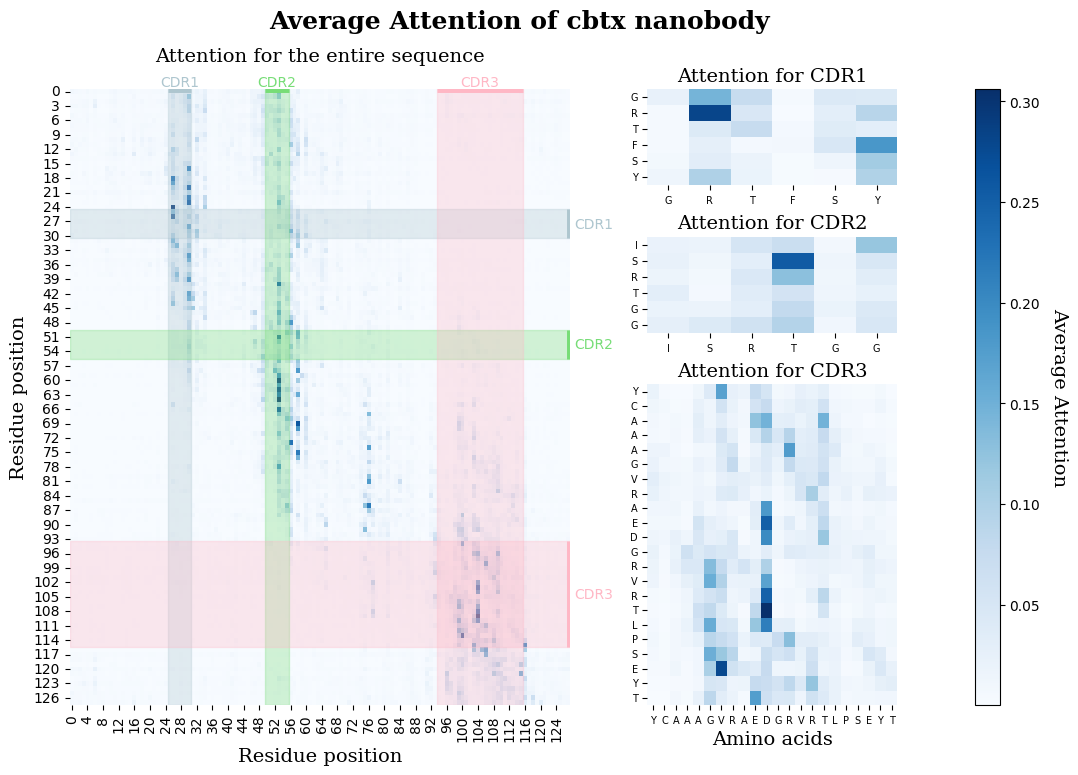

In [6]:


fig = plt.figure(1, figsize=(15, 15))
ax = fig.gca()
residues_cdr = [positions_cdr1, positions_cdr2, cdr3]
Plotter = PlotAttention(matrix = pa_f, figure_no = 2, cmap = "Blues", ax = ax)
Plotter.create_region_specific_subplot(sequence = nanobody_sequence,residues = residues_cdr,last_residue = len(nanobody_sequence), attentions = attentions, 
                                       no_heads_average = 3,
                                       title = "Average Attention of cbtx nanobody", 
                                       height_ratios = [0.3, 0.3, 1])
#plt.savefig(r"C:\Users\nilsh\OneDrive\Desktop\results_thesis\validation_embedding\bertology\attention_cdr_7eow.png", dpi = 300, format = "png")

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\nilsh\my_projects\ExpoSeq\my_experiments\max_new\reports_pipeline\embedding_clntx_non_bind_solo_bind.xlsx")  

Text(0, 0.5, 'UMAP_2')

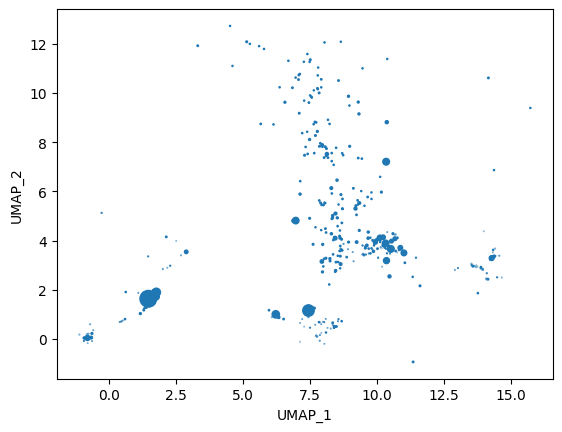

In [7]:
umap1 = df["UMAP_1"]
umap2 = df["UMAP_2"]
cf = df["cloneFraction"]

plt.scatter(umap1, umap2, s = cf * 500)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")